<a href="https://colab.research.google.com/github/alitaspaul/DSP-LAB/blob/master/Experiment3_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPERIMENT-3

---



**Linear convolution**

---


DATE: 08/09/2023

---



AIM:

Write a program to find linear convolution using :

i) Mathematical expression/ Direct equation

ii) Toeplitz matrix

---



SOFTWARE USED:

Python


---


THEORY:

i) DIRECT METHOD :

Given an LTI (Linear Time Invariant) system with impulse response h[n] and an input sequence x[n], the output of the system y[n] is obtained by convolving the input sequence and impulse response.

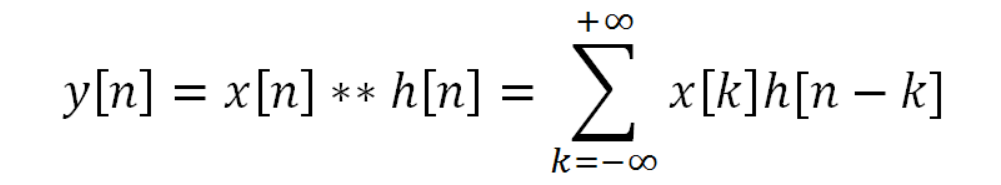

where, the sequence is of length N and is of length M.

ii) TOEPLITZ METHOD:

When the sequences and are represented as matrices, the convolution operation can be equivalently represented as :
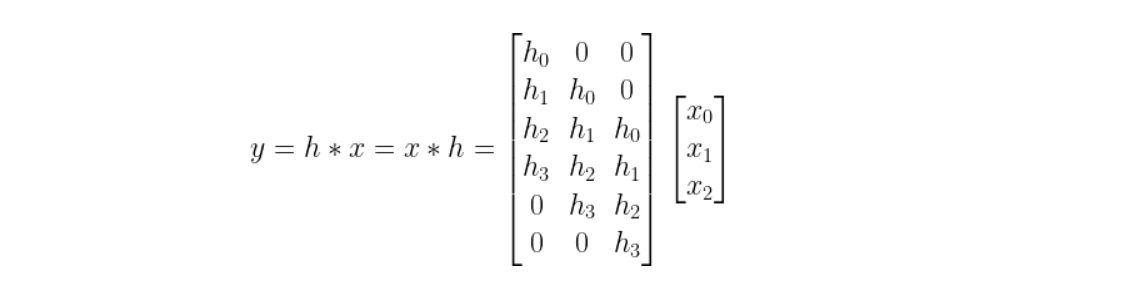
The matrix representing the incremental delays of h[n] used in the above equation is a special form of matrix called Toeplitz matrix. Toeplitz matrixes have constant entries along their diagonals. Toeplitz matrices are used to model systems that posses shift invariant properties. The property of shift invariance is evident from the matrix structure itself. Since we are modeling a Linear Time Invariant system, Toeplitz matrices are our natural choice.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
#mathematical approach
#input the input sequence x[n] and impulse response h[n]
x = np.array(input("Enter the elements of the input sequence:").split(",")).astype(int)
h = np.array(input("Enter the elements of the impulse response:").split(",")).astype(int)
xn=x
hn=h #these are for np.convolve, x will change if h>x
print(hn)
total = len(x)+len(h)-1

#output sequence
y = np.zeros(total) #len of the output sequence = len(x) + len(h) -1


#making the length of the arrays x,h same if needed
if len(x)<len(h):
  (x,h) = (h,x)
if len(x)!=len(h):
  if len(x)>len(h):
    z = np.zeros(len(x)-len(h)).astype(int)
    h = np.concatenate((h,z))  # to merge two arrays, i.e to do zero padding in this case

size = len(x) #the value of k

#convolution operation:
for i in range (total):#n
  sum=0
  for j in range(size):#k
    w = i-j
    if (w < 0) or (w > size-1): #no negative index, also index should not be out of bounds
      sum+=0
    else:
      sum+=x[j]*h[w]
  y[i] = sum

print("The output sequence (using mathematical function) is:", y.astype(int))

#verifying the output
print("The output sequence (using numpy.convolve) is:", np.convolve(xn,hn))

Enter the elements of the input sequence:1,2,3,4
Enter the elements of the impulse response:1,2,3,4,5
[1 2 3 4 5]
The output sequence (using mathematical function) is: [ 1  4 10 20 30 34 31 20]
The output sequence (using numpy.convolve) is: [ 1  4 10 20 30 34 31 20]


In [41]:
#toeplitz matrix
#input the input sequence x[n] and impulse response h[n]
x = np.array(input("Enter the elements of the input sequence:").split(",")).astype(int)
h = np.array(input("Enter the elements of the impulse response:").split(",")).astype(int)
hn = h

row = len(x)
column = len(x)+len(h)-1

if len(h)<column:
  z = np.zeros(column-len(h))
  h = np.concatenate((h,z))

#toeplitz matrix
toeplitz = h

for i in range (row-1):
  h = np.roll(h,1) #to cirular shift elements of array
  toeplitz = np.concatenate((toeplitz,h))

toeplitz.shape = (row,column)
toeplitz = np.transpose(toeplitz)

print("The output sequence (using toeplitz matrix) is:",np.dot(toeplitz,x).astype(int))
#verifying the output
print("The output sequence (using numpy.convolve) is:", np.convolve(x,hn))











Enter the elements of the input sequence:1,2,3,4
Enter the elements of the impulse response:1,2,1,2
The output sequence (using toeplitz matrix) is: [ 1  4  8 14 15 10  8]
The output sequence (using numpy.convolve) is: [ 1  4  8 14 15 10  8]
